Mohammed Alkhalaf

Misk class excrsice 

Recearch quations: 

1- what is Number of dishes based on diffrent criteria such as(reigon, course, diet, etc)?

2-what is number of dish per courses based on diffrent criteria such as(reigon, course, diet, etc)?

3- what isthe cooking and prep time, longest and shortest meals based on diffrent criteria such as(reigon, course, diet, etc)?

4-what is  most comman ingrediantes based on diffrent criteria such as(reigon, course, diet, etc)?


In [1]:
# installing packeges 
import math # Functions beyond the basic maths
# Import an entire library and give it an alias
import pandas as pd # For DataFrame and handling
import numpy as np # Array and numerical processing
import matplotlib.pyplot as plt # Low level plotting
import seaborn as sns # High level Plotting
import statsmodels.api as sm # Modeling, e.g. ANOVA
# Reading the data 
indian_food = pd.read_csv("indian_food.csv")
indian_food
indian_food_tidy = pd.read_csv("indian_food_tidy.csv")
indian_food_tidy
;

''

how many dishes per region?

In [2]:
indian_food.groupby(['region']).size()

region
Central        3
East          31
North         49
North East    25
South         59
West          74
dtype: int64

Ploting the results 

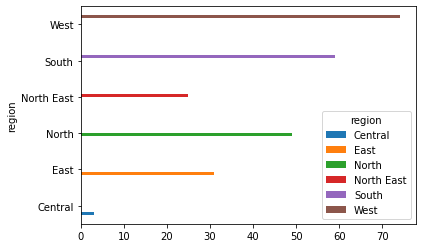

In [3]:
indian_food.groupby('region').region.value_counts().unstack().plot.barh()

how many dishes per state?

In [4]:
indian_food.groupby(['state']).size()

state
Andhra Pradesh     10
Assam              21
Bihar               3
Chhattisgarh        1
Goa                 3
Gujarat            35
Haryana             1
Jammu & Kashmir     2
Karnataka           6
Kerala              8
Madhya Pradesh      2
Maharashtra        30
Manipur             2
NCT of Delhi        1
Nagaland            1
Odisha              7
Punjab             32
Rajasthan           6
Tamil Nadu         20
Telangana           5
Tripura             1
Uttar Pradesh       9
Uttarakhand         1
West Bengal        24
dtype: int64

Ploting the results 

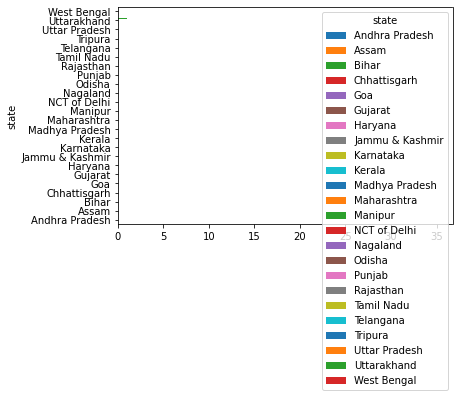

In [5]:
indian_food.groupby('state').state.value_counts().unstack().plot.barh()

how many dishes per diet?

In [6]:
indian_food.groupby(['diet']).size()

diet
non vegetarian     29
vegetarian        226
dtype: int64

Ploting the results 

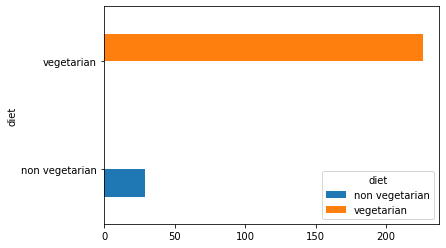

In [7]:
indian_food.groupby('diet').diet.value_counts().unstack().plot.barh()

how many dishes in each course?

In [8]:
indian_food.groupby("course").size()

course
dessert         85
main course    129
snack           39
starter          2
dtype: int64

how many dishes in each course based on the reigon?

In [9]:
indian_food.groupby(["region", "course"])["course"].count()

region      course     
Central     dessert         1
            main course     1
            snack           1
East        dessert        21
            main course    10
North       dessert         9
            main course    37
            snack           1
            starter         2
North East  dessert         7
            main course    18
South       dessert        18
            main course    31
            snack          10
West        dessert        23
            main course    28
            snack          23
Name: course, dtype: int64

how many dishes in each course based on the state?

In [10]:
indian_food.groupby(["region", "course"])["course"].count()

region      course     
Central     dessert         1
            main course     1
            snack           1
East        dessert        21
            main course    10
North       dessert         9
            main course    37
            snack           1
            starter         2
North East  dessert         7
            main course    18
South       dessert        18
            main course    31
            snack          10
West        dessert        23
            main course    28
            snack          23
Name: course, dtype: int64

The most comman 10 ingredients overall

In [11]:
indian_food_tidy[('ingredients')].value_counts()[:10].index.tolist()

['sugar',
 'ginger',
 'garam masala',
 'ghee',
 'curry leaves',
 'jaggery',
 'urad dal',
 'Rice flour',
 'milk',
 'tomato']

The most comman ingredients based on the region

In [12]:
indian_food_tidy.groupby('region')['ingredients'].apply(lambda x: x.value_counts().head(3))

region                         
-1          sugar                   5
            ginger                  4
            ghee                    3
Central     Milk powder             1
            Chana dal               1
            Cinnamon                1
East        sugar                  14
            ghee                    6
            Chhena                  6
North       garam masala           22
            ginger                 10
            garam masala powder     7
North East  mustard oil             8
            tomatoes                3
            bay leaf                3
South       curry leaves           15
            urad dal               12
            jaggery                 9
West        sugar                  12
            sesame seeds            8
            bengal gram flour       7
Name: ingredients, dtype: int64

the most comman ingrediatens in a falvor type?

In [13]:
indian_food_tidy.groupby('flavor_profile')['ingredients'].apply(lambda x: x.value_counts().head(1))

flavor_profile                  
-1              curry leaves         8
bitter          fenugreek leaves     2
sour            Mango                1
spicy           ginger              26
sweet           sugar               36
Name: ingredients, dtype: int64

the most comman ingrediatens in a course type?

In [14]:
indian_food_tidy.groupby('course')['ingredients'].apply(lambda x: x.value_counts().head(1))

course                        
dessert      sugar                36
main course  ginger               24
snack        urad dal              7
starter      green bell pepper     1
Name: ingredients, dtype: int64

what is the avrage preparing time?

In [15]:
np.mean(indian_food['prep_time'])

35.38666666666666

what is the avrage cooking time?

In [16]:
np.mean(indian_food['cook_time'])

38.91189427312775

what is the avrage preparing time based on the reigon?

In [17]:
indian_food.groupby('region')['prep_time'].mean()

region
Central       13.333333
East          43.518519
North         38.020833
North East    28.846154
South         58.181818
West          16.924242
Name: prep_time, dtype: float64

what is the avrage cooking time based on the reigon?

In [18]:
indian_food.groupby('region')['cook_time'].mean()

region
Central       48.333333
East          41.607143
North         41.979167
North East    28.461538
South         36.909091
West          41.880597
Name: cook_time, dtype: float64

In [19]:
# sum of total time for a meal
sum_time = indian_food["prep_time"] + indian_food["cook_time"]
indian_food["sum_time"] = sum_time
;

''

total avreage time for a meal 

In [20]:
np.mean(indian_food['sum_time'])

74.11111111111111

what is the avrage total time based on the reigon?

In [21]:
indian_food.groupby('region')['sum_time'].mean()

region
Central       61.666667
East          84.444444
North         80.000000
North East    57.307692
South         95.090909
West          58.530303
Name: sum_time, dtype: float64

shortest meals in total time by reigon

In [22]:
indian_food.loc[indian_food.groupby('region').sum_time.idxmin()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sum_time
194,Laapsi,"Cinnamon, jaggery, clarified butter, dry roasted",vegetarian,10.0,40.0,spicy,main course,Madhya Pradesh,Central,50.0
249,Shukto,"Green beans, bitter gourd, ridge gourd, banana...",vegetarian,10.0,20.0,spicy,main course,West Bengal,East,30.0
11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5.0,5.0,sweet,dessert,Punjab,North,10.0
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5.0,15.0,spicy,main course,Nagaland,North East,20.0
147,Papadum,"Lentils, black pepper, vegetable oil",vegetarian,5.0,5.0,spicy,snack,Kerala,South,10.0
214,Khichu,"Rice flour, sesame seeds, baking soda, peanut oil",vegetarian,5.0,10.0,spicy,snack,Gujarat,West,15.0


longest meals in total time by reigon

In [23]:
indian_food.loc[indian_food.groupby('region').sum_time.idxmax()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sum_time
89,Fara,"Chana dal, whole wheat flour, arhar dal, white...",vegetarian,10.0,60.0,spicy,snack,Chhattisgarh,Central,70.0
29,Misti doi,"Milk, jaggery",vegetarian,480.0,30.0,sweet,dessert,West Bengal,East,510.0
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500.0,120.0,spicy,main course,Punjab,North,620.0
66,Chak Hao Kheer,"Rice, milk, sugar, cardamom",vegetarian,240.0,45.0,sweet,dessert,Manipur,North East,285.0
155,Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495.0,40.0,NaN,main course,Kerala,South,535.0
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10.0,720.0,sweet,dessert,Maharashtra,West,730.0


shortest meals in total time by course

In [24]:
indian_food.loc[indian_food.groupby('course').sum_time.idxmin()]


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sum_time
11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5.0,5.0,sweet,dessert,Punjab,North,10.0
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5.0,15.0,spicy,main course,Nagaland,North East,20.0
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5.0,5.0,spicy,snack,NaN,NaN,10.0
81,Chicken Tikka,"Chicken, whole wheat bread, rice flour, garam ...",non vegetarian,120.0,45.0,spicy,starter,Punjab,North,165.0


longest meals in total time by course

In [25]:
indian_food.loc[indian_food.groupby('course').sum_time.idxmax()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sum_time
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10.0,720.0,sweet,dessert,Maharashtra,West,730.0
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500.0,120.0,spicy,main course,Punjab,North,620.0
128,Dosa,"Chana dal, urad dal, whole urad dal, blend ric...",vegetarian,360.0,90.0,spicy,snack,NaN,South,450.0
123,Tandoori Fish Tikka,"Chickpea flour, biryani masala powder, yogurt,...",non vegetarian,240.0,30.0,spicy,starter,Punjab,North,270.0


shortest meals in total time by diet

In [26]:
indian_food.loc[indian_food.groupby('diet').sum_time.idxmin()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sum_time
67,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5.0,15.0,spicy,main course,Nagaland,North East,20.0
11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5.0,5.0,sweet,dessert,Punjab,North,10.0


longest meals in total time by diet

In [27]:
indian_food.loc[indian_food.groupby('diet').sum_time.idxmax()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,sum_time
122,Tandoori Chicken,"Greek yogurt, garam masala, kasuri methi, mari...",non vegetarian,240.0,30.0,spicy,main course,Punjab,North,270.0
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10.0,720.0,sweet,dessert,Maharashtra,West,730.0
